In [1]:
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Numpy for numerical computing
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# display Python object in all frontends
from IPython.display import display

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [2]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import SVM classifier 
from sklearn.svm import SVC 

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split, StratifiedKFold

# Function for creating model pipelines - sklearn
from sklearn.pipeline import make_pipeline

# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

# set class weights for imbalaced datasets
from sklearn.utils.class_weight import compute_class_weight

# Ignore some warning messages
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning, UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)  

In [3]:
# Load the dataset
df = pd.read_csv('./diabetes.csv')
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [4]:
# Rename feature names
df.rename(columns={'glyhb':'a1c', 'stab.glu':'stab_glu', 'ratio':'chol_ratio','bp.1s':'bp_1s', 'bp.1d':'bp_1d',
                   'bp.2s':'bp_2s', 'bp.2d':'bp_2d', 'time.ppn':'time_ppn'}, inplace=True)
df.head()

,id,chol,stab_glu,hdl,chol_ratio,a1c,location,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,time_ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [5]:
df.columns



Index(['id', 'chol', 'stab_glu', 'hdl', 'chol_ratio', 'a1c', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp_1s', 'bp_1d', 'bp_2s',
       'bp_2d', 'waist', 'hip', 'time_ppn'],
      dtype='object')

In [6]:



# Dataframe dimensions
df.shape



(403, 19)

In [7]:
df.dtypes

id              int64
chol          float64
stab_glu        int64
hdl           float64
chol_ratio    float64
a1c           float64
location       object
age             int64
gender         object
height        float64
weight        float64
frame          object
bp_1s         float64
bp_1d         float64
bp_2s         float64
bp_2d         float64
waist         float64
hip           float64
time_ppn      float64
dtype: object

Min. Postprandial Time: 0.08 hours ( 5.0 minutes)
Max. Postprandial Time: 26.0 hours ( 1560.0 minutes)


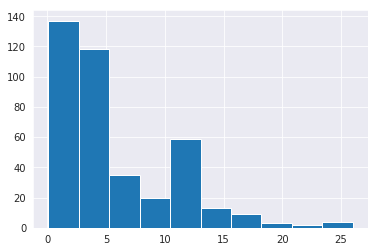

In [8]:
# Postprandial time in hours
df_ppn_h = df['time_ppn'] / 60

# Display min and max postprandial times
print('Min. Postprandial Time:', round(df_ppn_h.min(),2), 'hours', '(', df.time_ppn.min(), 'minutes)')
print('Max. Postprandial Time:', round(df_ppn_h.max(),2), 'hours', '(', df.time_ppn.max(), 'minutes)')

# Histogram for time_ppn in hours
(df['time_ppn'] / 60).hist()
plt.show()

In [9]:
# Drop unused features
df.drop(['id', 'stab_glu', 'location', 'time_ppn'], axis=1, inplace=True)
df.head()

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0
2,228.0,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0
3,78.0,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0
4,249.0,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0


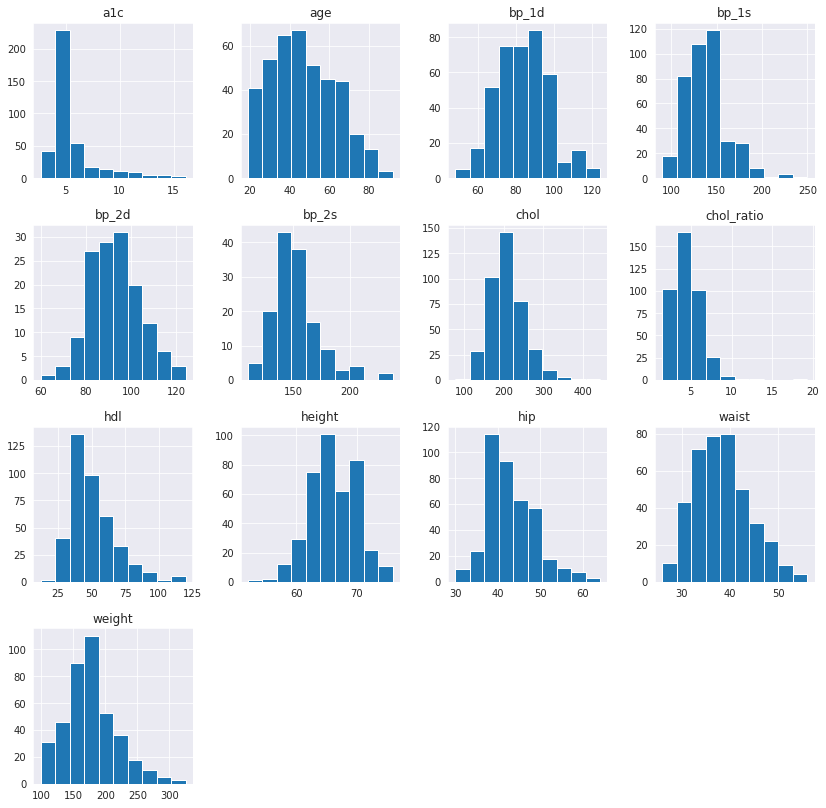

In [10]:
df.hist(figsize=(14,14))

plt.show()

In [11]:
df.describe(include=['object'])

,gender,frame
count,403,391
unique,2,3
top,female,medium
freq,234,184


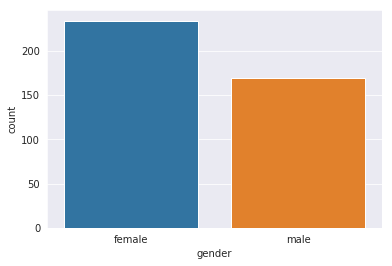

In [12]:
# Bar plot for 'gender'
sns.countplot(x='gender', data=df)
plt.show()


In [13]:
# Display count of each class
Counter(df.gender)

Counter({'female': 234, 'male': 169})

In [14]:
Counter({'female': 234, 'male': 169})

Counter({'female': 234, 'male': 169})

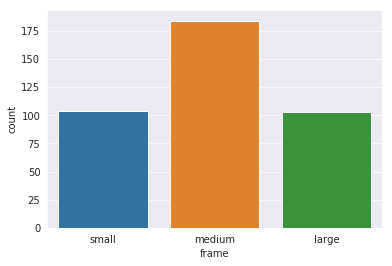

Counter({'medium': 184, 'large': 103, 'small': 104, nan: 12})

In [15]:
# Bar plot for 'frame'
sns.countplot(x='frame', data=df, order=['small', 'medium', 'large'])
plt.show()

# Display count of each class
Counter(df.frame)

In [16]:
Counter({'medium': 184, 'large': 103, 'small': 104, np.nan: 12})

Counter({'medium': 184, 'large': 103, 'small': 104, nan: 12})

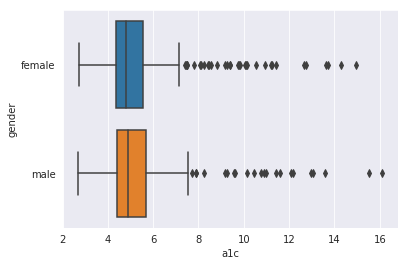

In [17]:
# Segment a1c by gender and plot distributions
sns.boxplot(y='gender', x='a1c', data=df)
plt.show()

In [18]:
# Segment a1c by gender and display the means within each class
df.groupby('gender').mean()

,chol,hdl,chol_ratio,a1c,age,height,weight,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
gender,,,,,,,,,,,,,
female,208.435897,52.111111,4.355983,5.494342,45.833333,63.733624,174.487179,136.307359,82.484848,153.350649,91.753247,38.124464,44.347639
male,207.023810,48.125000,4.752381,5.724074,48.260355,69.118343,181.916667,137.730539,84.479042,151.218750,93.453125,37.589286,41.226190


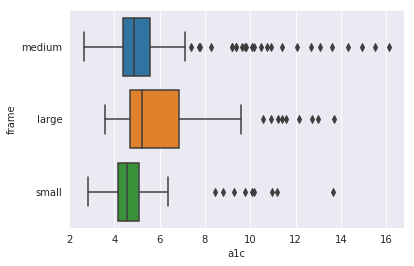

In [19]:
# Segment a1c by frame and plot distributions
sns.boxplot(y='frame', x='a1c', data=df)
plt.show()

In [20]:
# Segment by frame and display the means within each class
df.groupby('frame').mean()

,chol,hdl,chol_ratio,a1c,age,height,weight,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
frame,,,,,,,,,,,,,
large,208.000000,44.601942,4.992233,6.105657,52.844660,66.643564,203.805825,141.184466,83.398058,154.513514,93.648649,41.823529,45.735294
medium,213.538043,50.798913,4.638043,5.640281,45.706522,65.701087,178.311475,137.762431,84.950276,151.506667,91.680000,37.890710,43.360656
small,197.495146,55.543689,3.845631,5.040882,42.211538,66.088235,150.961538,130.029126,79.980583,153.318182,93.681818,34.048077,39.778846


In [21]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with a1c
sort_corr_cols = correlations.a1c.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,a1c,age,chol_ratio,chol,waist,bp_1s,weight,hip,height,bp_2s,bp_1d,hdl,bp_2d
a1c,1.000000,0.338929,0.328665,0.247099,0.226184,0.197936,0.171882,0.141401,0.063023,0.042671,0.032375,-0.149145,-0.160241
age,0.338929,1.000000,0.148510,0.233119,0.149645,0.443041,-0.055970,0.008819,-0.090493,0.366340,0.058227,0.038088,-0.134088
chol_ratio,0.328665,0.148510,1.000000,0.475521,0.304162,0.119386,0.281649,0.194622,0.094335,-0.048257,0.048193,-0.686907,-0.155987
chol,0.247099,0.233119,0.475521,1.000000,0.124489,0.203344,0.066889,0.079402,-0.058858,0.080418,0.171605,0.186581,0.003482
waist,0.226184,0.149645,0.304162,0.124489,1.000000,0.196489,0.849855,0.837080,0.051094,0.093171,0.167110,-0.268369,0.048802
bp_1s,0.197936,0.443041,0.119386,0.203344,0.196489,1.000000,0.090873,0.136655,-0.047827,0.868773,0.596557,0.019804,0.291365
weight,0.171882,-0.055970,0.281649,0.066889,0.849855,0.090873,1.000000,0.829115,0.251251,-0.071383,0.175956,-0.290983,0.041657
hip,0.141401,0.008819,0.194622,0.079402,0.837080,0.136655,0.829115,1.000000,-0.107832,0.013381,0.145805,-0.210060,0.045458
height,0.063023,-0.090493,0.094335,-0.058858,0.051094,-0.047827,0.251251,-0.107832,1.000000,-0.060529,0.038598,-0.101419,0.077816
bp_2s,0.042671,0.366340,-0.048257,0.080418,0.093171,0.868773,-0.071383,0.013381,-0.060529,1.000000,0.305244,0.128762,0.420709


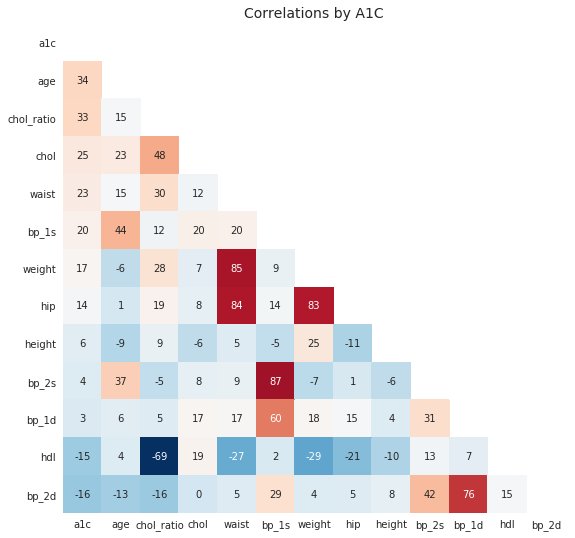

In [22]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
with sns.axes_style('white'):
    sns.heatmap(sort_corr*100, 
                cmap='RdBu_r', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)

plt.title('Correlations by A1C', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [23]:
print('Before:', df.shape)
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

Before: (403, 15)
(403, 15)


In [24]:
# Display number of missing values by feature
df.isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c            13
age             0
gender          0
height          5
weight          1
frame          12
bp_1s           5
bp_1d           5
bp_2s         262
bp_2d         262
waist           2
hip             2
dtype: int64

In [25]:
# df.drop(df[df['a1c'].isnull()].index, inplace=True)
df.dropna(subset=['a1c'], inplace=True)
print(df.shape)

(390, 15)


In [26]:
df.isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c             0
age             0
gender          0
height          5
weight          1
frame          11
bp_1s           5
bp_1d           5
bp_2s         252
bp_2d         252
waist           2
hip             2
dtype: int64

In [27]:
# Count the number of missing values for categorical features
df.select_dtypes(include=['object']).isnull().sum()

gender     0
frame     11
dtype: int64

In [28]:
# fill missing values in frame with 'Missing
df['frame'].fillna('Missing', inplace=True)

In [29]:
# Count the number of missing values for categorical features
df.select_dtypes(include=['object']).isnull().sum()

gender    0
frame     0
dtype: int64

In [30]:
# Display the count for each class
df.frame.value_counts()

medium     178
small      102
large       99
Missing     11
Name: frame, dtype: int64

In [31]:
# Count the number of missing values for numerical features
df.select_dtypes(exclude=['object']).isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c             0
age             0
height          5
weight          1
bp_1s           5
bp_1d           5
bp_2s         252
bp_2d         252
waist           2
hip             2
dtype: int64

In [32]:
# Display observations with bp_1s missing
df[df.bp_1s.isnull()]

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
7,227.0,44.0,5.2,3.94,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0
13,183.0,46.0,4.0,4.59,40,female,59.0,165.0,medium,NaN,NaN,NaN,NaN,37.0,43.0
37,190.0,32.0,5.9,3.56,46,male,72.0,205.0,medium,NaN,NaN,NaN,NaN,46.0,49.0
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,NaN,NaN,NaN,NaN,31.0,35.0
215,197.0,46.0,4.3,4.75,36,female,64.0,136.0,small,NaN,NaN,NaN,NaN,32.0,37.0


In [33]:
# Create 2 new features, bp_s and bp_d
df['bp_s'] = df[['bp_1s', 'bp_2s']].mean(axis=1)
df['bp_d'] = df[['bp_1d', 'bp_2d']].mean(axis=1)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,bp_s,bp_d
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,118.0,59.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,112.0,68.0


In [34]:
# Drop the old features: bp_1s, bp_2s, bp_1d, bp_2d 
df.drop(['bp_1s', 'bp_2s', 'bp_1d', 'bp_2d'], axis=1, inplace=True)
df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,29.0,38.0,118.0,59.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,46.0,48.0,112.0,68.0


In [35]:
# Display observations with bp_s missing
df[df.bp_s.isnull()]

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
7,227.0,44.0,5.2,3.94,37,male,59.0,170.0,medium,34.0,39.0,NaN,NaN
13,183.0,46.0,4.0,4.59,40,female,59.0,165.0,medium,37.0,43.0,NaN,NaN
37,190.0,32.0,5.9,3.56,46,male,72.0,205.0,medium,46.0,49.0,NaN,NaN
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,31.0,35.0,NaN,NaN
215,197.0,46.0,4.3,4.75,36,female,64.0,136.0,small,32.0,37.0,NaN,NaN


In [36]:
# Display and count observations with cholesetrol values missing
display(df.loc[df[['chol', 'hdl', 'chol_ratio']].isnull().any(axis=1)])
print(df[['chol', 'hdl', 'chol_ratio']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
27,NaN,NaN,NaN,4.28,48,male,68.0,100.0,small,27.0,33.0,120.0,85.0


chol          1
hdl           1
chol_ratio    1
dtype: int64


In [37]:
# Display and count observations with waist and hip values missing
display(df[df[['waist', 'hip']].isnull().any(axis=1)])
print(df[['waist', 'hip']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
336,158.0,64.0,2.5,2.73,30,female,62.0,142.0,medium,NaN,NaN,108.0,68.0
393,192.0,69.0,2.8,4.38,51,male,65.0,146.0,large,NaN,NaN,150.0,114.0


waist    2
hip      2
dtype: int64


In [38]:
# Display and count observations with height or weight missing
display(df[df.height.isnull() | df.weight.isnull()])
print(df[['weight', 'height']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,31.0,35.0,NaN,NaN
86,218.0,54.0,4.0,10.55,51,female,NaN,215.0,large,42.0,53.0,139.0,69.0
161,115.0,36.0,3.2,13.60,58,male,69.0,NaN,medium,30.0,37.0,125.0,69.0
195,173.0,37.0,4.7,4.31,40,female,NaN,130.0,small,37.0,38.0,122.0,76.0
231,214.0,35.0,6.1,5.38,44,female,NaN,190.0,large,38.0,44.0,140.0,75.0
317,300.0,59.0,5.1,4.56,34,female,NaN,160.0,small,40.0,47.0,120.0,60.0


weight    1
height    5
dtype: int64


In [39]:
# Count the number of missing values for numerical features
print(df.select_dtypes(exclude=['object']).isnull().sum(), '\n')

# Count the total number of missing values 
print('Total number of missing values (NaNs):',
      df.select_dtypes(exclude=['object']).isnull().sum().sum(),'\n')

# Number of observations with at least one NaN
row_nan = df.loc[df.isnull().any(axis=1)].shape[0]
print('Observations with at least 1 Nan:', row_nan)

chol          1
hdl           1
chol_ratio    1
a1c           0
age           0
height        5
weight        1
waist         2
hip           2
bp_s          5
bp_d          5
dtype: int64 

Total number of missing values (NaNs): 23 

Observations with at least 1 Nan: 13


In [40]:
# Current shape of dataframe
df.shape

(390, 13)

In [41]:
# Drop all observations with missing values
df.dropna(inplace=True)

print(df.shape)

(377, 13)


In [42]:
# Count missing values
df.isnull().sum()

chol          0
hdl           0
chol_ratio    0
a1c           0
age           0
gender        0
height        0
weight        0
frame         0
waist         0
hip           0
bp_s          0
bp_d          0
dtype: int64

In [43]:
df['bmi'] = round(((df.weight / (df.height)**2) * 703), 1)
df.drop(['height', 'weight'], axis=1, inplace=True)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,hip,bp_s,bp_d,bmi
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,38.0,118.0,59.0,22.1
1,165.0,24.0,6.9,4.44,29,female,large,46.0,48.0,112.0,68.0,37.4


In [44]:
# create a new whr feature
df['whr'] = round((df.waist / df.hip), 2)

# drop hip feature
df.drop(['hip'], axis=1, inplace=True)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,bp_s,bp_d,bmi,whr
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,118.0,59.0,22.1,0.76
1,165.0,24.0,6.9,4.44,29,female,large,46.0,112.0,68.0,37.4,0.96


In [45]:
# create health_risk feature from a1c
df['health_risk'] = df.a1c.apply(lambda a: 'no_diabetes' if a < 5.7 \
                         else 'diabetes' if a >= 6.5 else 'pre_diabetes')
df.head(3)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,bp_s,bp_d,bmi,whr,health_risk
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,118.0,59.0,22.1,0.76,no_diabetes
1,165.0,24.0,6.9,4.44,29,female,large,46.0,112.0,68.0,37.4,0.96,no_diabetes
2,228.0,37.0,6.2,4.64,58,female,large,49.0,187.5,92.0,48.4,0.86,no_diabetes


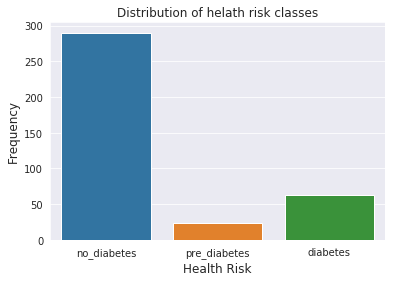

In [46]:
# Class distribution for health_risk 
sns.countplot(x='health_risk', data=df,
              order=['no_diabetes', 'pre_diabetes', 'diabetes'])
plt.title('Distribution of helath risk classes')
plt.xlabel('Health Risk', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

In [47]:
def class_count(ser):
    # input is one column of dataframe = Series
    # value_counts() produces another Pandas Series
    pd_sr = ser.value_counts()
    n = len(ser)
    # get the name of Series
    ser_name = ser.name
    print()
    print('{}:'.format(ser_name),'\t', 'Count:', '\t', '%')

    for i in pd_sr.index:
        print(i,'\t',pd_sr[i], '\t\t', round(100*pd_sr[i]/n,2))

In [48]:
class_count(df.health_risk)


health_risk: 	 Count: 	 %
no_diabetes 	 290 		 76.92
diabetes 	 63 		 16.71
pre_diabetes 	 24 		 6.37


In [49]:
# convert non-numeric class labels to numeric labels
# according to the dictionary's mapping
hr = {'no_diabetes':0, 'pre_diabetes': 1, 'diabetes': 2}
y_hrisk = df['health_risk'].map(hr)

In [50]:
# drop the a1c column and add previously defined y_hrisk as new numeric feature h_risk
df.drop('a1c', axis=1, inplace=True)
df['h_risk'] = y_hrisk

df.head()

,chol,hdl,chol_ratio,age,gender,frame,waist,bp_s,bp_d,bmi,whr,health_risk,h_risk
0,203.0,56.0,3.6,46,female,medium,29.0,118.0,59.0,22.1,0.76,no_diabetes,0
1,165.0,24.0,6.9,29,female,large,46.0,112.0,68.0,37.4,0.96,no_diabetes,0
2,228.0,37.0,6.2,58,female,large,49.0,187.5,92.0,48.4,0.86,no_diabetes,0
3,78.0,12.0,6.5,67,male,large,33.0,110.0,50.0,18.6,0.87,no_diabetes,0
4,249.0,28.0,8.9,64,male,medium,44.0,138.0,80.0,27.8,1.07,diabetes,2


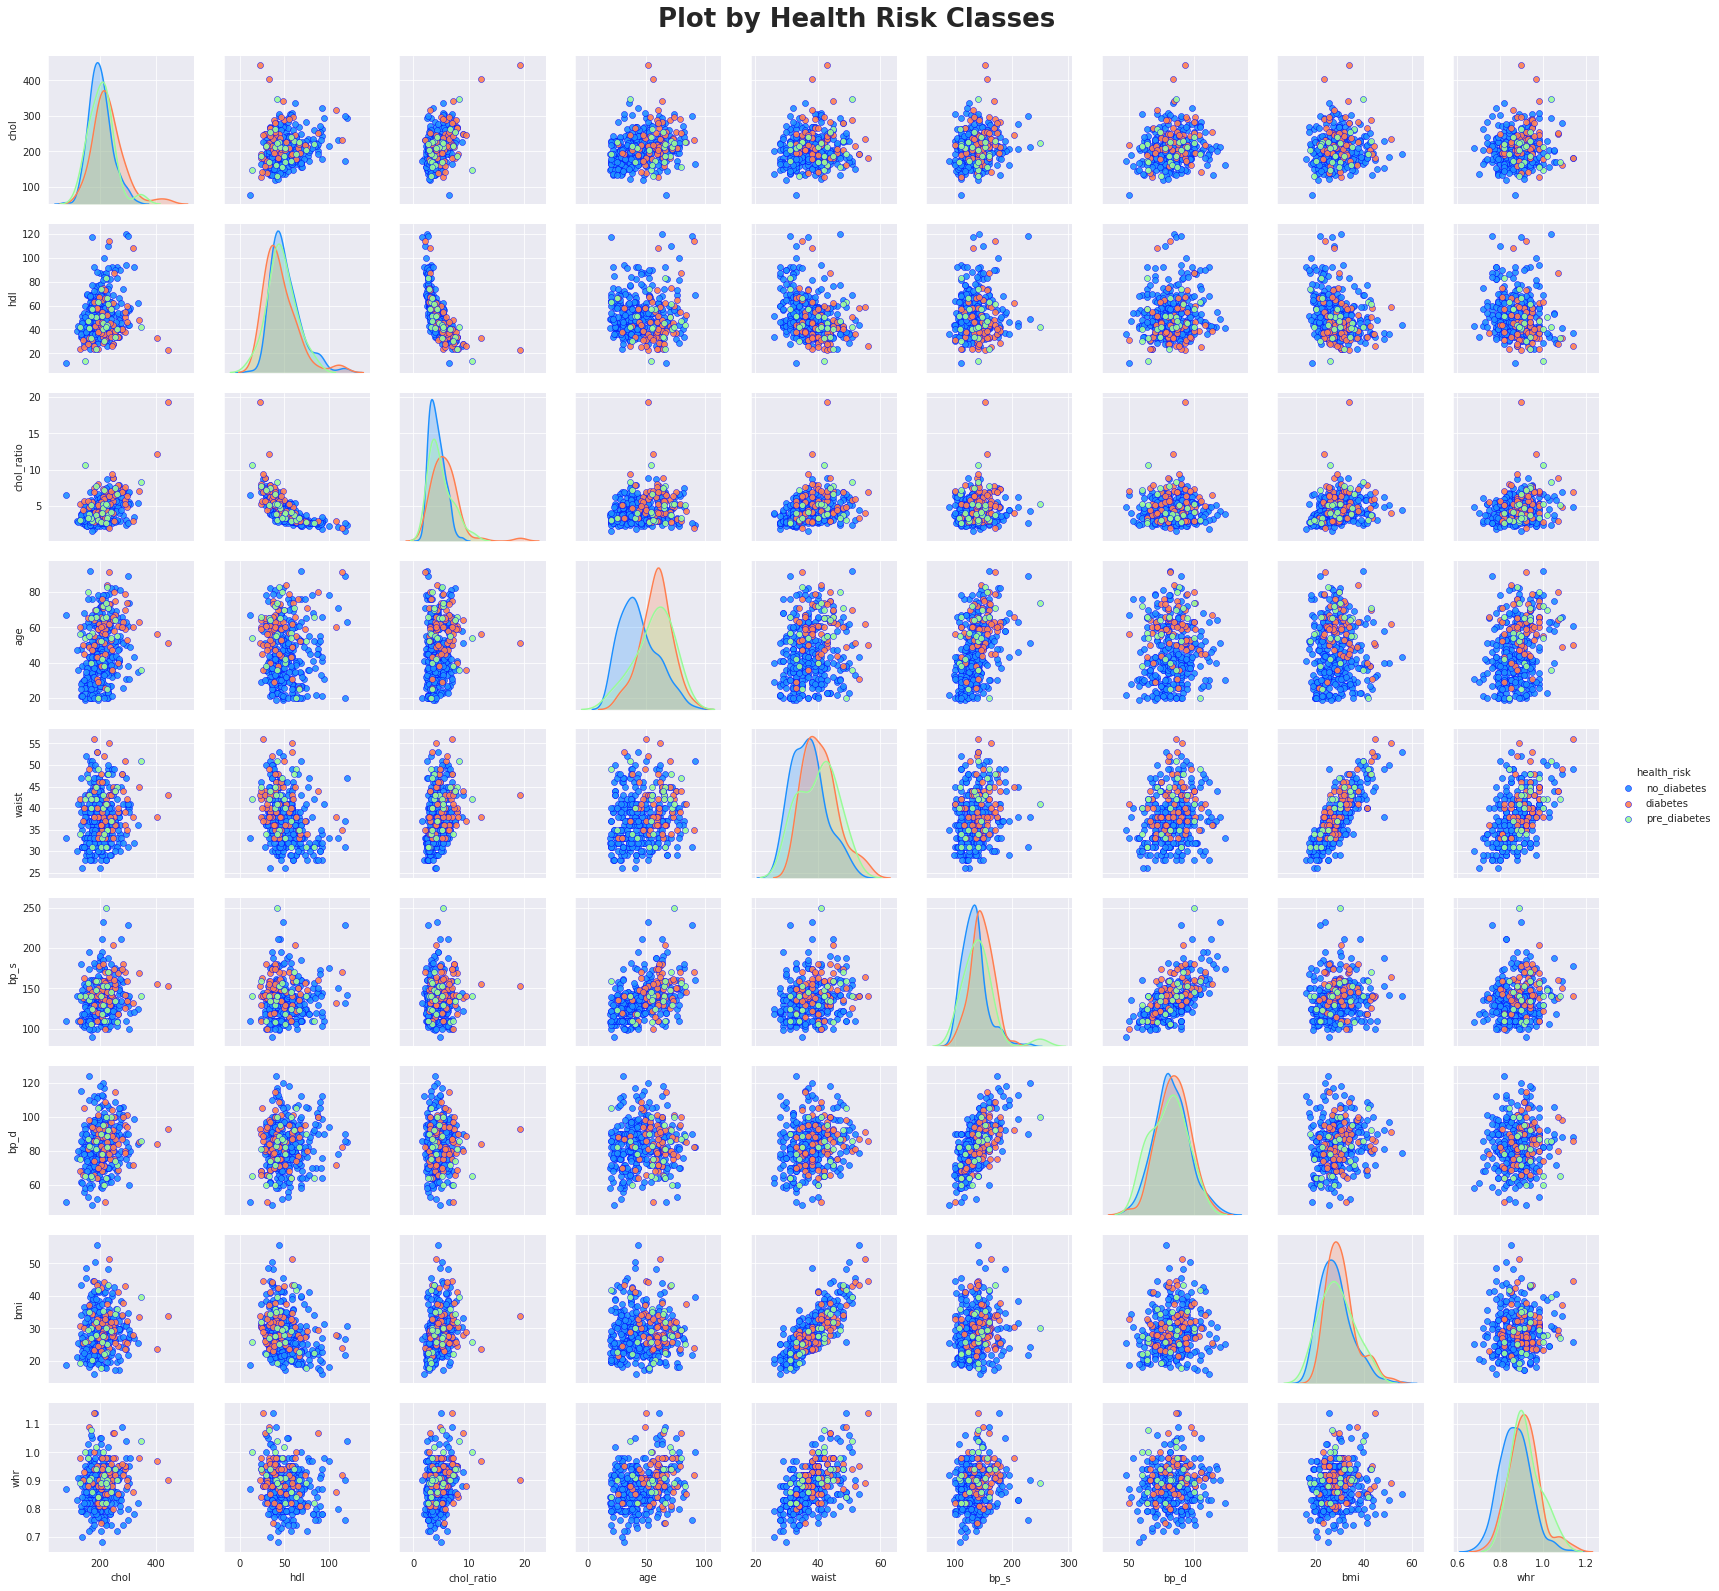

In [51]:
# Plot Seaborn's pairplot
g = sns.pairplot(df.drop('h_risk', axis=1),
                 hue='health_risk',
                 palette={'diabetes' : 'coral', 'pre_diabetes' : 'palegreen',
                          'no_diabetes' : 'dodgerblue'},
                 plot_kws={'alpha' : 0.9, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by Health Risk Classes',
             fontsize=26,
             fontweight='bold')

# save the plot for easier analyzing out of notebook
g.savefig('Figures/pairplot_health_risk.png')

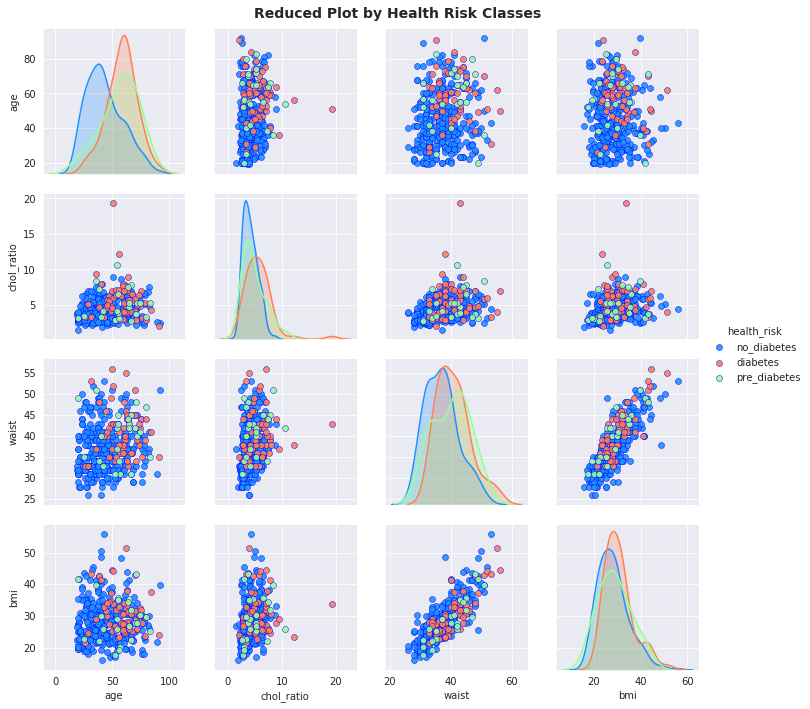

In [52]:
# Plot Seaborn's pairplot
g = sns.pairplot(df.drop('h_risk', axis=1),
                 vars=['age','chol_ratio', 'waist', 'bmi'], # reduce to less features
                 hue='health_risk',
                 palette={'diabetes' : 'coral', 'pre_diabetes' : 'palegreen',
                          'no_diabetes' : 'dodgerblue'},
                 plot_kws={'alpha' : 0.9, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by Health Risk Classes',
             fontsize=14,
             fontweight='bold')

# save the plot
g.savefig('Figures/pairplot_health_risk_r.png')

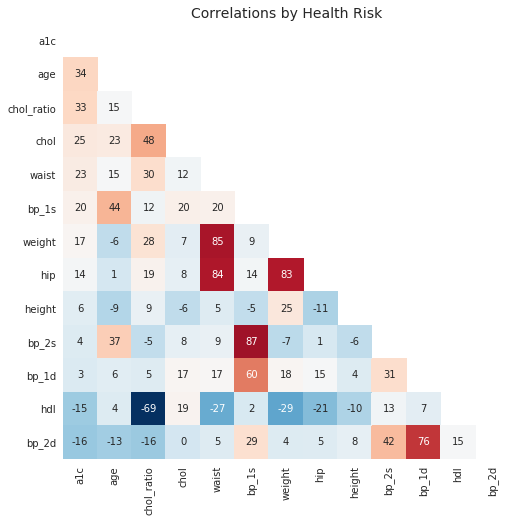

In [53]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 8x8
plt.figure(figsize=(8,8))

# Plot heatmap of annotated correlations; change background to white
with sns.axes_style('white'):
    sns.heatmap(sort_corr*100, 
                cmap='RdBu_r', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)

plt.title('Correlations by Health Risk', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [54]:
# Segment by health_risk and display the means within each class
df.groupby(by='health_risk').mean().sort_values('h_risk')

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,h_risk
health_risk,,,,,,,,,,
no_diabetes,202.831034,51.741379,4.244483,43.586207,37.134483,134.234483,82.998276,28.368621,0.870724,0.0
pre_diabetes,206.541667,47.125000,4.916667,56.666667,40.125000,141.437500,80.625000,29.141667,0.922083,1.0
diabetes,230.793651,45.507937,5.700000,58.555556,40.920635,147.500000,84.746032,30.800000,0.914286,2.0


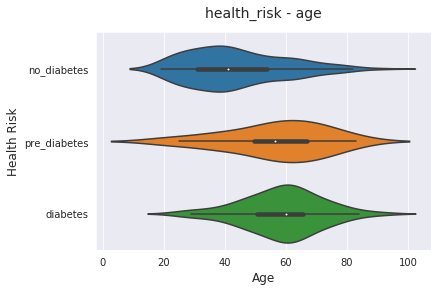

In [55]:
# Segment age by health_risk and plot distributions
sns.violinplot(y='health_risk', x='age', data=df,
            order=['no_diabetes', 'pre_diabetes','diabetes'])

plt.title('health_risk - age', fontsize=14, pad=15)
plt.xlabel('Age',size=12)
plt.ylabel('Health Risk', size=12)
plt.show()

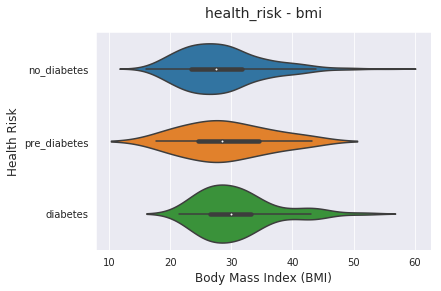

In [56]:
# Segment bmi by health_risk and plot distributions
sns.violinplot(y='health_risk', x='bmi', data=df,
            order=['no_diabetes', 'pre_diabetes','diabetes'])

plt.title('health_risk - bmi', fontsize=14, pad=15)
plt.xlabel('Body Mass Index (BMI)',size=12)
plt.ylabel('Health Risk', size=12)
plt.show()

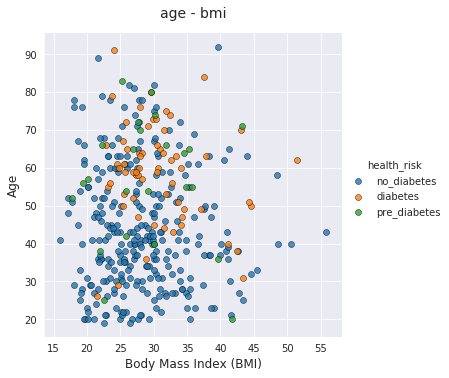

In [57]:
# Scatterplot of bmi vs. age
sns.lmplot(x='bmi',
           y='age',
           data=df,
           hue='health_risk',
           fit_reg=False,
           scatter_kws={'alpha':0.8, 'edgecolor':'k','linewidth':0.5})

plt.title('age - bmi', fontsize=14, pad=15)
plt.xlabel('Body Mass Index (BMI)',size=12)
plt.ylabel('Age', size=12)
plt.show()

In [58]:
# Get dummy variables for frame and gender
# Create new dataframe with dummy features
abt = pd.get_dummies(df, columns=['frame', 'gender'])

abt.head()

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,health_risk,h_risk,frame_Missing,frame_large,frame_medium,frame_small,gender_female,gender_male
0,203.0,56.0,3.6,46,29.0,118.0,59.0,22.1,0.76,no_diabetes,0,0,0,1,0,1,0
1,165.0,24.0,6.9,29,46.0,112.0,68.0,37.4,0.96,no_diabetes,0,0,1,0,0,1,0
2,228.0,37.0,6.2,58,49.0,187.5,92.0,48.4,0.86,no_diabetes,0,0,1,0,0,1,0
3,78.0,12.0,6.5,67,33.0,110.0,50.0,18.6,0.87,no_diabetes,0,0,1,0,0,0,1
4,249.0,28.0,8.9,64,44.0,138.0,80.0,27.8,1.07,diabetes,2,0,0,1,0,0,1


In [59]:
# Drop health_risk feature
abt.drop(['health_risk'], axis=1, inplace=True)

abt.head()

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,h_risk,frame_Missing,frame_large,frame_medium,frame_small,gender_female,gender_male
0,203.0,56.0,3.6,46,29.0,118.0,59.0,22.1,0.76,0,0,0,1,0,1,0
1,165.0,24.0,6.9,29,46.0,112.0,68.0,37.4,0.96,0,0,1,0,0,1,0
2,228.0,37.0,6.2,58,49.0,187.5,92.0,48.4,0.86,0,0,1,0,0,1,0
3,78.0,12.0,6.5,67,33.0,110.0,50.0,18.6,0.87,0,0,1,0,0,0,1
4,249.0,28.0,8.9,64,44.0,138.0,80.0,27.8,1.07,2,0,0,1,0,0,1


In [60]:
# Save analytical base table
abt.to_csv('./analytical_base_table.csv', index=None)

In [61]:
# Create models dictionary, it will be needed for ploting
models = {
    'l1' : 'Logistic Regression - L1',
    'l2' : 'Logistic Regression - L2',
    'svm' : 'Support Vector Machine (SVM)',
    'rf' : 'Random Forest',
    'gb' : 'Gradient Boosting',
    'ab' : 'AdaBoost'
}

In [62]:
# Object for target variable
y = abt.h_risk

# object for input features
X = abt.drop(['h_risk'], axis=1)

# display shapes of X and y
print(X.shape, y.shape)

(377, 15) (377,)


In [63]:
# Define random_state; we will use it through the notebook
random_state = 789

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=abt.h_risk)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

263 114 263 114


In [72]:
def fit_tune_CV(pipe, scorer):
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    print('skf calculated')
    # Create empty dictionary called fitted_models
    fit_models = {}

    # Loop through model pipelines, tuning each one and saving it to fitted_models
    for name, pipeline in pipe.items():
        print(name, 'Searching best Hyperparametres')
        # Create cross-validation object from pipeline and hyperparameters
        model = GridSearchCV(pipeline, hyperparameters[name], cv=skf,
                             scoring=scorer, iid=True, n_jobs=-1)
        print(name, 'fitting')
        # Fit model on X_train, y_train
        model.fit(X_train, y_train)

        # Store model in fitted_models[name]
        fit_models[name] = model

        # Print '{name} has been fitted'
        print(name, 'has been fitted')
    return fit_models


def evaluation(fit_models):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
        lst.append([name, model.best_score_, f1_score(y_test, pred, average='macro'),
                    accuracy_score(y_test, pred)])

    eval_df = pd.DataFrame(lst, columns=['model', 'CV_score', 'f1_macro', 'accuracy'])
    eval_df.set_index('model', inplace = True)
    return eval_df

def eval_plot(eval_df):
    #eval_df = evaluation(fit_models)
    eval_dfp = eval_df.reset_index()
    eval_dfp = pd.melt(eval_dfp,id_vars='model',var_name='metrics', value_name='score')

    sns.catplot(x='model', y='score', hue='metrics',data=eval_dfp, kind='bar',
                palette={'CV_score' : 'red', 'f1_macro' : 'orange',
                          'accuracy' : 'royalblue'})
    plt.title('Evaluation Metrics', fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel('Model', size=12)
    plt.ylabel('Score', size=12)
    plt.show()
    
    
def plot_conf_mat_w_and_wo_norm(fit_models, model_id, color):
    # Plot confusion matrix heatmaps
    pred = fit_models[model_id].predict(X_test)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle(models[model_id], fontsize=14)
    f.subplots_adjust(top=0.85, wspace=0.3)

    # confusion matrix without normalization
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='d',
                cbar=True,
                square=True,
                cmap=color,
                ax=ax1)

    ax1.set_xticklabels(labels=target_names)
    ax1.set_yticklabels(labels=target_names, va='center')
    ax1.set_title('Confusion Matrix w/o Normalization')
    ax1.set_xlabel('Predicted Labels', size=12)
    ax1.set_ylabel('True Labels', size=12)

    # normalized confusion matrix
    matn = mat / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matn,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='.2f',
                cbar=True,
                square=True,
                cmap=color,
                vmin = 0,
                vmax = 1,
                ax=ax2)

    ax2.set_xticklabels(labels=target_names)
    ax2.set_yticklabels(labels=target_names, va='center')
    ax2.set_title('Normalized Confusion Matrix')
    ax2.set_xlabel('Predicted Label', size=12)
    ax2.set_ylabel('True Label', size=12)

    plt.show()
    

    
def plot_norm_conf_matrices(fit_models, color):
    # Prepare list of coordintaes for axes
    lt = []
    col = 2
    row = int(len(fit_models) / col)
    for r in range(row):
        for c in range(col):
            lt.append([r, c])

    # Create figure and subplots
    figs_y = row * 4
    f, axs = plt.subplots(row, col, figsize=(10, figs_y))
    f.suptitle('Normalized Confusion Matrices', fontsize=14)
    f.subplots_adjust(top=0.94, wspace=0.90, hspace=0.2)

    i = 0
    # Loop for each fitted model        
    for id, model in fit_models.items():
        pred = model.predict(X_test)
        name = models[id]
        r = lt[i][0]
        c = lt[i][1]
        i += 1

        mat = confusion_matrix(y_test, pred)    
        # normalized confusion matrix
        matn = mat / mat.sum(axis=1)[:, np.newaxis]
        sns.heatmap(matn,
                    annot=True,
                    annot_kws=dict(fontsize=14),
                    fmt='.2f',
                    cbar=False,
                    square=True,
                    cmap=color,
                    vmin = 0,
                    vmax = 1,
                    #cbar_kws = {'shrink' : 0.85},
                    ax=axs[r, c])

        axs[r, c].set_xticklabels(labels=target_names)
        axs[r, c].set_yticklabels(labels=target_names, va='center')
        axs[r, c].set_title(name)
        axs[r, c].set_xlabel('Predicted Label', size=12)
        axs[r, c].set_ylabel('True Label', size=12)

    plt.show()
    
    
def class_rep_cm(fit_models, model_id):
    # Predict classes using model_id
    pred = fit_models[model_id].predict(X_test)
    print()
    print('\t', models[model_id])
    print('\t', '='*len(models[model_id]))

    # Display confusion matrix for y_test and pred
    conf_df = pd.DataFrame(confusion_matrix(y_test, pred), columns=target_names, index=target_names)
    conf_df.index.name = 'True Labels'
    conf_df = conf_df.rename_axis('Predicted Labels', axis='columns')
    display(conf_df)

    # Display classification report
    print()
    print(classification_report(y_test, pred, target_names=target_names))
    
    
def best_hyp_param(fit_models):
    # Display best_params_ for each fitted model

    # Initialize empty dataframe
    bp_df = pd.DataFrame()

    # Loop through all fitted models
    for name, model in fit_models.items():
        # Dictionary of best_params
        d = model.best_params_
        # Model name from model dictionary
        model_name = models[name]

        # Create dataframe for best_params_dictionary
        bp_dft = pd.DataFrame.from_dict(d, orient='index', columns=['Value'])
        # Insert the column 'Model'
        bp_dft.insert(0, 'Model', model_name)
        # Concatenate previous dataframe with new one from this run
        bp_df = pd.concat([bp_df, bp_dft])

    # Finalize the output of the dataframe
    bp_df.reset_index(inplace=True)
    bp_df.set_index('Model', inplace = True)
    bp_df.rename(columns={'index' : 'Hyperparameter'}, inplace=True)
    return bp_df


In [67]:

# Pipeline dictionary
pipelines_pm = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(), SVC(random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=random_state)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=random_state)),
    'ab' : make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=random_state))
}
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

l2_hyperparameters = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'logisticregression__solver' : ['newton-cg', 'lbfgs', 'sag']
}
# SVM hyperparameters
svm_hyperparameters = { 
    'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
    'svc__gamma': [5, 1, 0.1, 0.01]
}
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200, 300],
    'gradientboostingclassifier__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
    'gradientboostingclassifier__max_depth' : [2, 3, 4]
}
# AdaBoost hyperparameters
ab_hyperparameters = {
    'adaboostclassifier__n_estimators' : [50, 100, 200],
    'adaboostclassifier__learning_rate' : [0.005, 0.01, 0.05, 0.1, 0.2]
}
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'svm' : svm_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'ab' : ab_hyperparameters
}

In [68]:
fitted_models_pm = fit_tune_CV(pipelines_pm, None)

skf calculated
l1 Searching best Hyperparametres
l1 fitting
l1 has been fitted
l2 Searching best Hyperparametres
l2 fitting
l2 has been fitted
svm Searching best Hyperparametres
svm fitting
svm has been fitted
rf Searching best Hyperparametres
rf fitting
rf has been fitted
gb Searching best Hyperparametres
gb fitting
gb has been fitted
ab Searching best Hyperparametres
ab fitting
ab has been fitted


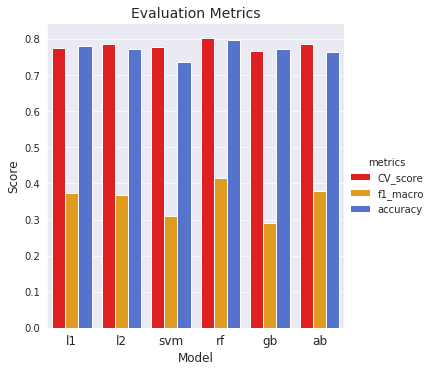

,CV_score,f1_macro,accuracy
model,,,
l1,0.775665,0.374365,0.780702
l2,0.787072,0.369116,0.771930
svm,0.779468,0.308980,0.736842
rf,0.802281,0.416112,0.798246
gb,0.768061,0.290429,0.771930
ab,0.787072,0.380148,0.763158


In [69]:
# Plot and display evaluation metrics for simple plain models
eval_df_pm = evaluation(fitted_models_pm)
eval_plot(eval_df_pm)
display(eval_df_pm)

In [71]:
target_names = ['no_diabetes', 'pre_diabetes', 'diabetes']

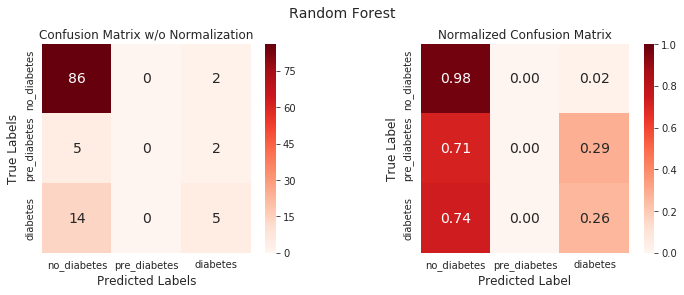

In [73]:
# Plot confusion matrix heatmaps without and with normalization
plot_conf_mat_w_and_wo_norm(fitted_models_pm, 'rf', 'Reds')    

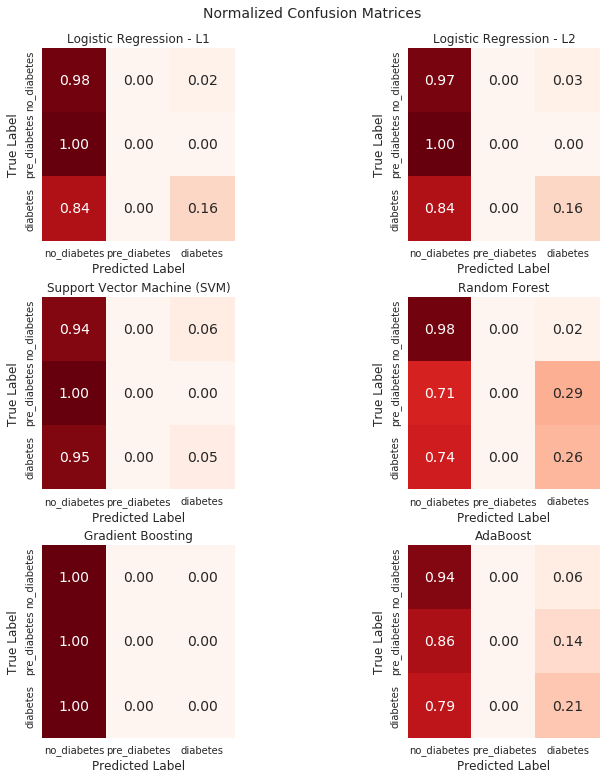

In [74]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_pm, 'Reds')

In [75]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_pm, 'rf')
class_rep_cm(fitted_models_pm, 'ab')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,86,0,2
pre_diabetes,5,0,2
diabetes,14,0,5



              precision    recall  f1-score   support

 no_diabetes       0.82      0.98      0.89        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.56      0.26      0.36        19

    accuracy                           0.80       114
   macro avg       0.46      0.41      0.42       114
weighted avg       0.72      0.80      0.75       114


	 AdaBoost


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,83,0,5
pre_diabetes,6,0,1
diabetes,15,0,4



              precision    recall  f1-score   support

 no_diabetes       0.80      0.94      0.86        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.40      0.21      0.28        19

    accuracy                           0.76       114
   macro avg       0.40      0.38      0.38       114
weighted avg       0.68      0.76      0.71       114



In [76]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_pm)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.5
Logistic Regression - L2,logisticregression__C,0.05
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.0005
Support Vector Machine (SVM),svc__gamma,1
Support Vector Machine (SVM),svc__kernel,poly
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,5


# Change the parametre for evaluating algorithms in GridSearch 

In [77]:
# Pipeline dictionary
pipelines_f1 = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(), SVC(random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=random_state)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=random_state)),
    'ab' : make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=random_state))
}

In [78]:
# Fit and tune models with cross-validation
fitted_models_f1 = fit_tune_CV(pipelines_f1, 'f1_macro')

skf calculated
l1 Searching best Hyperparametres
l1 fitting
l1 has been fitted
l2 Searching best Hyperparametres
l2 fitting
l2 has been fitted
svm Searching best Hyperparametres
svm fitting
svm has been fitted
rf Searching best Hyperparametres
rf fitting
rf has been fitted
gb Searching best Hyperparametres
gb fitting
gb has been fitted
ab Searching best Hyperparametres
ab fitting
ab has been fitted


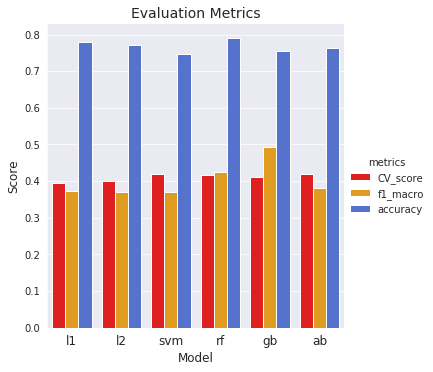

,CV_score,f1_macro,accuracy
model,,,
l1,0.394822,0.374365,0.780702
l2,0.401379,0.369116,0.771930
svm,0.418707,0.370232,0.745614
rf,0.417343,0.423769,0.789474
gb,0.412266,0.492203,0.754386
ab,0.419067,0.380148,0.763158


In [79]:
# Plot and display evaluation metrics for simple plain models
eval_df_f1 = evaluation(fitted_models_f1)
eval_plot(eval_df_f1)
display(eval_df_f1)

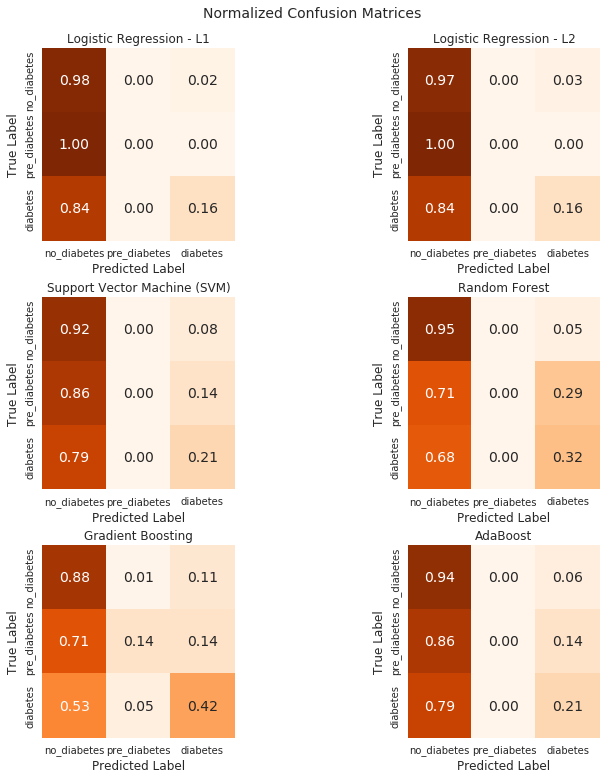

In [80]:
plot_norm_conf_matrices(fitted_models_f1, 'Oranges')

In [81]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_f1, 'gb')
class_rep_cm(fitted_models_f1, 'rf')


	 Gradient Boosting


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,77,1,10
pre_diabetes,5,1,1
diabetes,10,1,8



              precision    recall  f1-score   support

 no_diabetes       0.84      0.88      0.86        88
pre_diabetes       0.33      0.14      0.20         7
    diabetes       0.42      0.42      0.42        19

    accuracy                           0.75       114
   macro avg       0.53      0.48      0.49       114
weighted avg       0.74      0.75      0.74       114


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,84,0,4
pre_diabetes,5,0,2
diabetes,13,0,6



              precision    recall  f1-score   support

 no_diabetes       0.82      0.95      0.88        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.50      0.32      0.39        19

    accuracy                           0.79       114
   macro avg       0.44      0.42      0.42       114
weighted avg       0.72      0.79      0.75       114



In [82]:
best_hyp_param(fitted_models_f1)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.5
Logistic Regression - L2,logisticregression__C,0.05
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.001
Support Vector Machine (SVM),svc__gamma,1
Support Vector Machine (SVM),svc__kernel,poly
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,1


In [83]:
# Define dictionary with class weights
class_weight_list = compute_class_weight('balanced', np.unique(y_train), y_train)

class_weights = dict(zip(np.unique(y_train), class_weight_list))
print(class_weights)

# count population of classes
print(Counter(abt.h_risk))

{0: 0.43399339933993397, 1: 5.1568627450980395, 2: 1.9924242424242424}
Counter({0: 290, 2: 63, 1: 24})


In [84]:
# Pipeline dictionary for class_weight
pipelines_cs = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            class_weight=class_weights, random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            class_weight=class_weights, random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(),
                          SVC(class_weight=class_weights, random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(),
                         RandomForestClassifier(class_weight=class_weights, random_state=random_state))
}

In [85]:
# Fit and tune models with cross-validation
fitted_models_cs = fit_tune_CV(pipelines_cs, 'f1_macro')

skf calculated
l1 Searching best Hyperparametres
l1 fitting
l1 has been fitted
l2 Searching best Hyperparametres
l2 fitting
l2 has been fitted
svm Searching best Hyperparametres
svm fitting
svm has been fitted
rf Searching best Hyperparametres
rf fitting
rf has been fitted


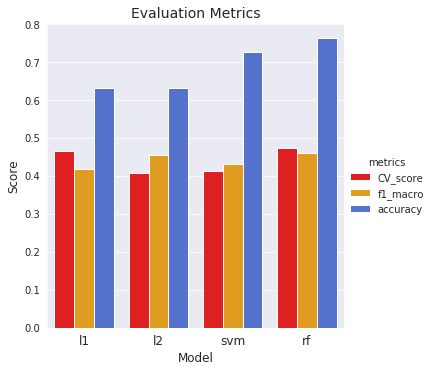

,CV_score,f1_macro,accuracy
model,,,
l1,0.465165,0.419640,0.631579
l2,0.407404,0.454356,0.631579
svm,0.413010,0.432931,0.728070
rf,0.475013,0.459627,0.763158


In [87]:
#Plot and display evaluation metrics for simple plain models
eval_df_cs = evaluation(fitted_models_cs)
eval_plot(eval_df_cs)
display(eval_df_cs)

In [89]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_cs, 'rf')
class_rep_cm(fitted_models_cs, 'l2')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,75,0,13
pre_diabetes,5,0,2
diabetes,7,0,12



              precision    recall  f1-score   support

 no_diabetes       0.86      0.85      0.86        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.44      0.63      0.52        19

    accuracy                           0.76       114
   macro avg       0.44      0.49      0.46       114
weighted avg       0.74      0.76      0.75       114


	 Logistic Regression - L2


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,62,18,8
pre_diabetes,4,3,0
diabetes,5,7,7



              precision    recall  f1-score   support

 no_diabetes       0.87      0.70      0.78        88
pre_diabetes       0.11      0.43      0.17         7
    diabetes       0.47      0.37      0.41        19

    accuracy                           0.63       114
   macro avg       0.48      0.50      0.45       114
weighted avg       0.76      0.63      0.68       114



In [90]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_cs)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.1
Logistic Regression - L2,logisticregression__C,0.5
Logistic Regression - L2,logisticregression__solver,sag
Support Vector Machine (SVM),svc__C,0.1
Support Vector Machine (SVM),svc__gamma,0.1
Support Vector Machine (SVM),svc__kernel,poly
Random Forest,randomforestclassifier__criterion,entropy
Random Forest,randomforestclassifier__max_features,sqrt
Random Forest,randomforestclassifier__min_samples_leaf,5


# SMOTE

In [91]:
# Pipeline dictionary for SMOTE
pipelines_sm = {
    'l1' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                        random_state=random_state)),
    'l2' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     LogisticRegression(penalty='l2', multi_class='multinomial',
                                        random_state=random_state)),
    'svm' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                      SVC(random_state=random_state)),
    'rf' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     RandomForestClassifier(random_state=random_state)),
    'gb' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     GradientBoostingClassifier(random_state=random_state)),
    'ab' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     AdaBoostClassifier(random_state=random_state))
}

In [92]:
fitted_models_sm = fit_tune_CV(pipelines_sm, 'f1_macro')

skf calculated
l1 Searching best Hyperparametres
l1 fitting
l1 has been fitted
l2 Searching best Hyperparametres
l2 fitting
l2 has been fitted
svm Searching best Hyperparametres
svm fitting
svm has been fitted
rf Searching best Hyperparametres
rf fitting
rf has been fitted
gb Searching best Hyperparametres
gb fitting
gb has been fitted
ab Searching best Hyperparametres
ab fitting
ab has been fitted


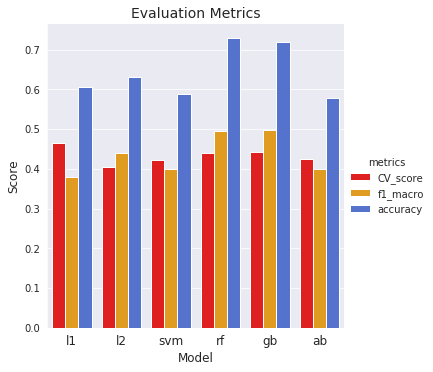

,CV_score,f1_macro,accuracy
model,,,
l1,0.464904,0.378132,0.605263
l2,0.404481,0.438971,0.631579
svm,0.423098,0.399104,0.587719
rf,0.439974,0.495851,0.728070
gb,0.441448,0.498533,0.719298
ab,0.425235,0.399770,0.578947


In [93]:
# Plot and display evaluation metrics for simple plain models
eval_df_sm = evaluation(fitted_models_sm)
eval_plot(eval_df_sm)
display(eval_df_sm)

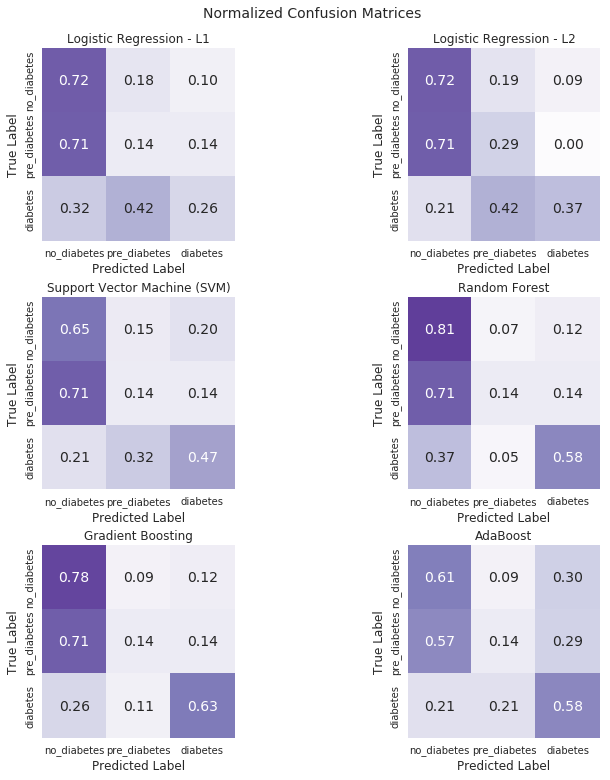

In [94]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_sm, 'Purples')

In [95]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_sm, 'gb')
class_rep_cm(fitted_models_sm, 'rf')


	 Gradient Boosting


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,69,8,11
pre_diabetes,5,1,1
diabetes,5,2,12



              precision    recall  f1-score   support

 no_diabetes       0.87      0.78      0.83        88
pre_diabetes       0.09      0.14      0.11         7
    diabetes       0.50      0.63      0.56        19

    accuracy                           0.72       114
   macro avg       0.49      0.52      0.50       114
weighted avg       0.76      0.72      0.74       114


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,71,6,11
pre_diabetes,5,1,1
diabetes,7,1,11



              precision    recall  f1-score   support

 no_diabetes       0.86      0.81      0.83        88
pre_diabetes       0.12      0.14      0.13         7
    diabetes       0.48      0.58      0.52        19

    accuracy                           0.73       114
   macro avg       0.49      0.51      0.50       114
weighted avg       0.75      0.73      0.74       114



In [96]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_sm)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.05
Logistic Regression - L2,logisticregression__C,0.01
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.1
Support Vector Machine (SVM),svc__gamma,0.1
Support Vector Machine (SVM),svc__kernel,sigmoid
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,sqrt
Random Forest,randomforestclassifier__min_samples_leaf,15


In [97]:

# initialize dataframe
eval_df_all = pd.DataFrame()

# dictionary of evaluation dataframes
dgroups = {'pm' : eval_df_pm, 'f1':eval_df_f1, 'cs':eval_df_cs, 'sm':eval_df_sm}
# list of model groups abreviations 
mgroups = list(dgroups.keys())
# concatenate all dataframes
for i in mgroups:
    eval_df_t = dgroups[i].copy().reset_index()
    # change model names in the column 'model'
    eval_df_t['model'] = eval_df_t['model'] + '-{}'.format(i) 
    eval_df_all = pd.concat([eval_df_all, eval_df_t])

# sort new dataframe and display 10 best models
eval_df_all = eval_df_all.set_index('model')

In [98]:
len(eval_df_all)

22

In [99]:
eval_df_all.sort_values('CV_score', ascending=False).head(1)

,CV_score,f1_macro,accuracy
model,,,
rf-pm,0.802281,0.416112,0.798246


In [100]:
eval_df_all.sort_values('accuracy', ascending=False).head(1)

,CV_score,f1_macro,accuracy
model,,,
rf-pm,0.802281,0.416112,0.798246


In [102]:
eval_df_all.sort_values('f1_macro', ascending=False).head(10)

,CV_score,f1_macro,accuracy
model,,,
gb-sm,0.441448,0.498533,0.719298
rf-sm,0.439974,0.495851,0.728070
gb-f1,0.412266,0.492203,0.754386
rf-cs,0.475013,0.459627,0.763158
l2-cs,0.407404,0.454356,0.631579
l2-sm,0.404481,0.438971,0.631579
svm-cs,0.413010,0.432931,0.728070
rf-f1,0.417343,0.423769,0.789474
l1-cs,0.465165,0.419640,0.631579


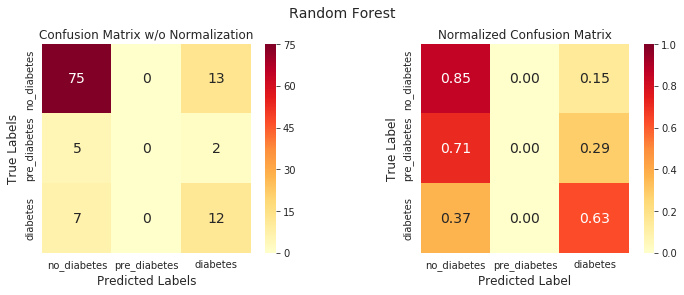

In [103]:
# Plot confusion matrix heatmaps without and with normalization
plot_conf_mat_w_and_wo_norm(fitted_models_cs, 'rf', 'YlOrRd')        

In [104]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_cs, 'rf')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,75,0,13
pre_diabetes,5,0,2
diabetes,7,0,12



              precision    recall  f1-score   support

 no_diabetes       0.86      0.85      0.86        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.44      0.63      0.52        19

    accuracy                           0.76       114
   macro avg       0.44      0.49      0.46       114
weighted avg       0.74      0.76      0.75       114

